In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

Image.open("wolfram.gif").save("wolfram.png")

FileNotFoundError: [Errno 2] No such file or directory: 'wolfram.gif'

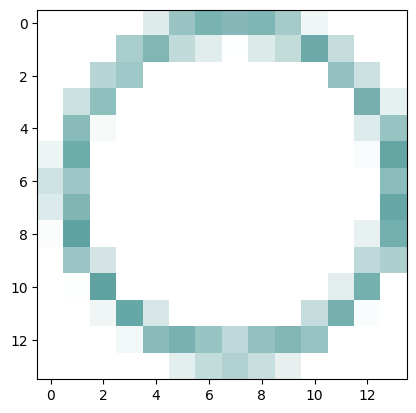

In [3]:
img = Image.open("wolfram.png")

arr = np.array(img)

blue_c = arr[82:96, 24:38, :]
Image.fromarray(blue_c).save("blue.png")

plt.imshow(arr[82:96, 24:38, :])

In [4]:
def getCoords(img, template):
    List = []
    w, h = template.shape[0], template.shape[1]

    showImg = img.copy()

    res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.95
    loc = np.where( res >= threshold)

    for i in zip(*loc[::-1]):
        location = (i[0] + w, i[1] + h)
        List.append([i, location])

        cv2.rectangle(showImg, i, location, 255, 0)

    List = sorted(List, key=lambda x: x[0][1])

    plt.imshow(showImg)
    plt.show()
    return List

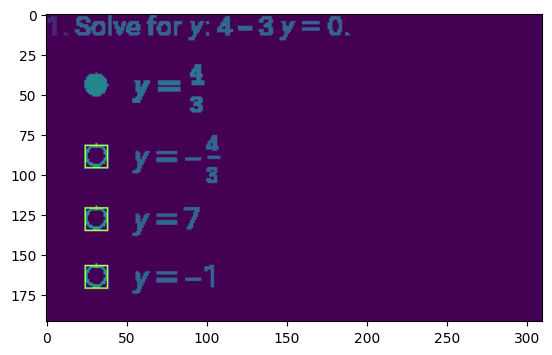

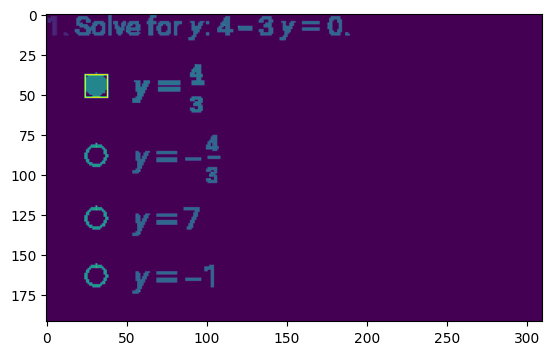

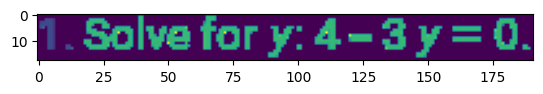

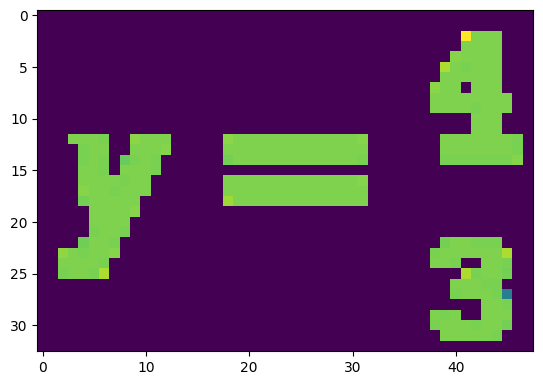

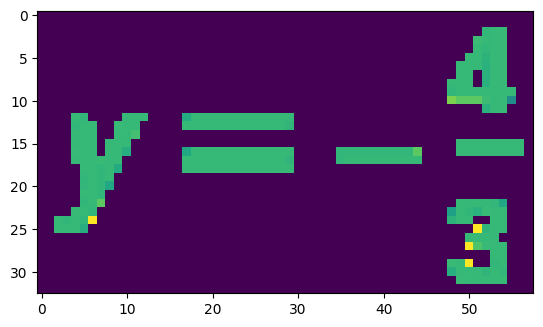

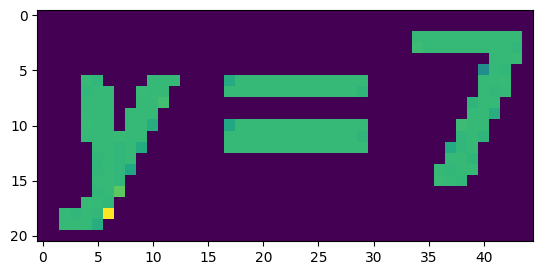

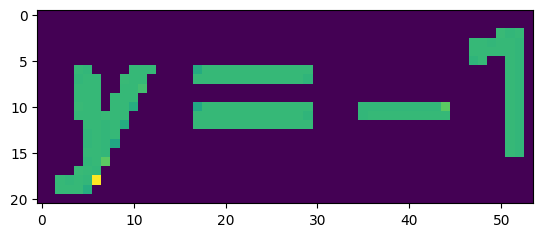

In [11]:
gifs = os.listdir("gifs")

for gif in gifs:
    img = cv2.imread(f'gifs/{gif}',0)
    blue_template = cv2.imread('blue.png',0)
    pink_template = cv2.imread('pink.png',0)

    img_w, img_h = img.shape[1], img.shape[0]

    blueCoord = getCoords(img, blue_template)
    pinkCoord = getCoords(img, pink_template)

    solution_idx = 0
    for coord in blueCoord:
        if pinkCoord[0][0][1] > coord[0][1]:
            solution_idx += 1
        else:
            break

    os.mkdir(f"processedImgs/{gif.replace('.gif', '')}_{solution_idx}")

    allCoord = [[(int(0.05*img_h), int(0.05*img_h)), (int(0.05*img_h), int(0.05*img_h))]] + blueCoord[:solution_idx] + pinkCoord + blueCoord[solution_idx:] + [[(img_h, img_h), (img_h, img_h)]]

    for i in range(len(allCoord) - 1):
        lower_coord = allCoord[i][0][1] - int(0.05 * img_h)
        upper_coord = allCoord[i+1][0][1] - int(0.05 * img_h)

        if i == 0:
            img_block = img[lower_coord:upper_coord, 0:img_w]

        else:
            img_block = img[lower_coord:upper_coord, allCoord[i][1][0]+2:img_w]

        ret,thresh = cv2.threshold(img_block,20,255,cv2.THRESH_BINARY)
        white_pt_coords=np.argwhere(thresh)
        min_y = min(white_pt_coords[:,0])
        min_x = min(white_pt_coords[:,1])
        max_y = max(white_pt_coords[:,0])
        max_x = max(white_pt_coords[:,1])

        crop = img_block[
            max(0, min_y-2):min(max_y+2, img_block.shape[0]),
            max(0, min_x-2):min(max_x+2, img_block.shape[1])
        ]
        
        plt.imshow(crop)
        plt.show()
        img_block = Image.fromarray(crop)
        img_block.save(f"processedImgs/{gif.replace('.gif', '')}_{solution_idx}/block" + str(i) + ".png")